# 4조 CoCoPlam 과제

### mnist_test.csv 다운로드 링크: https://www.kaggle.com/oddrationale/mnist-in-csv
- MNIST Dataset: 28 x 28 pixel로 이루어진 숫자 손 글씨 사진

## Q1. Mnist Dataset으로 K-means Cluster, GMM 비교하기

In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### MNIST Dataset Load

- 결과는 label과 각 pixel의 값

In [2]:
mnist_df = pd.read_csv('mnist_test.csv')
mnist_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 - ex) 50번째 이미지

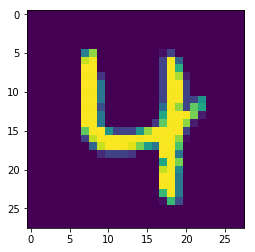

In [3]:
plt.imshow(mnist_df.iloc[49].values[1:].reshape(28, 28))

### mnist_data 만들기

In [4]:
mnist_data = mnist_df.drop('label', axis=1).values

In [5]:
print("mnist_data type: {0},  shape: {1}".format(type(mnist_data), mnist_data.shape))

mnist_data type: <class 'numpy.ndarray'>,  shape: (10000, 784)


### Q1-1. K-means cluster를 이용하여 10개의 cluster를 만들고, 'kmenas cluster' 컬럼을 생성하고 어떻게 매핑되었는지 확인해보기

In [6]:
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300,random_state=2990).fit(mnist_data)
kmeans_cluster_labels = kmeans.predict(mnist_data)

mnist_df['kmeans_cluster'] = kmeans_cluster_labels

mnist_result = mnist_df.groupby(['label'])['kmeans_cluster'].value_counts()
print(mnist_result)

label  kmeans_cluster
0      5                 812
       8                  62
       2                  55
       3                  25
       9                  13
       0                   5
       4                   3
       7                   3
       6                   2
1      1                 643
       7                 486
       2                   3
       3                   2
       8                   1
2      0                 702
       7                 113
       2                  61
       1                  45
       4                  27
       3                  23
       8                  20
       5                  17
       9                  15
       6                   9
3      2                 709
       8                 143
       1                  59
       0                  49
       6                  14
       9                  10
                        ... 
6      2                   2
       6                   2
7      6             

### Q1-2. gmm cluster를 이용하여 10개의 component를 만들고, 'gmm cluster' 컬럼을 생성하고 어떻게 매핑되었는지 확인해보기

In [8]:
gmm = GaussianMixture(n_components=10, random_state=2990).fit(mnist_data)
gmm_cluster_labels = gmm.predict(mnist_data)

mnist_df['gmm_cluster'] = gmm_cluster_labels

mnist_result = mnist_df.groupby(['label'])['gmm_cluster'].value_counts()
print(mnist_result)

label  gmm_cluster
0      5              485
       4              391
       3               83
       8               10
       0                3
       7                3
       2                2
       1                1
       6                1
       9                1
1      6              722
       0              377
       3               31
       2                3
       8                2
2      7              621
       0              107
       3              107
       2               66
       6               56
       9               20
       5               19
       8               18
       1               14
       4                4
3      3              481
       2              415
       6               57
       7               28
       9                9
                     ... 
6      2                1
7      1              582
       9              203
       3              148
       0               40
       6               38
       7           

In [18]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k')
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

### 500개의 데이터 셋, 10개의 cluster 셋, cluster_std=0.5 을 만듬. 

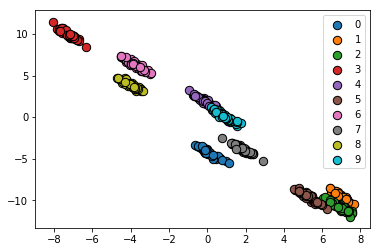

In [22]:
X, y = make_blobs(n_samples=500, n_features=2, centers=10, cluster_std=0.5, random_state=2990)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

### Q1-3. 위 함수와 X 이용하여 K-means clustering의 결과를 시각화하기

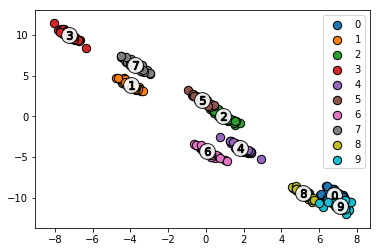

In [23]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용 
kmeans = KMeans(10, random_state=2990)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

### Q1-4. 위 함수를 이용하여 GMM clustering의 결과를 시각화하기

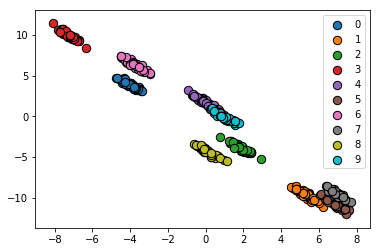

In [27]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=10, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)